In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df1 = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#df2 = pd.read_csv('combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#df3 = pd.read_csv('combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#df4 = pd.read_csv('combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])




In [3]:
movie_titles = pd.read_csv("movie_titles.csv",encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'], error_bad_lines=False)


C:\Users\Soft Key\AppData\Local\Temp\ipykernel_560\3572452191.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movie_titles = pd.read_csv("movie_titles.csv",encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'], error_bad_lines=False)
b'Skipping line 72: expected 3 fields, saw 4\nSkipping line 264: expected 3 fields, saw 5\nSkipping line 350: expected 3 fields, saw 4\nSkipping line 366: expected 3 fields, saw 4\nSkipping line 394: expected 3 fields, saw 4\nSkipping line 466: expected 3 fields, saw 4\nSkipping line 582: expected 3 fields, saw 4\nSkipping line 600: expected 3 fields, saw 4\nSkipping line 670: expected 3 fields, saw 4\nSkipping line 672: expected 3 fields, saw 4\nSkipping line 729: expected 3 fields, saw 4\nSkipping line 776: expected 3 fields, saw 4\nSkipping line 827: expected 3 fields, saw 4\nSkipping line 834: expected 3 fields, saw 4\nSkipping line

In [4]:
movie_titles

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [5]:
movie_titles.set_index('Movie_Id', inplace = True)
movie_titles.drop('Year', axis=1, inplace=True)

In [6]:
movie_titles

,Name
Movie_Id,
1,Dinosaur Planet
2,Isle of Man TT 2004 Review
3,Character
4,Paula Abdul's Get Up & Dance
5,The Rise and Fall of ECW
...,...
17766,Where the Wild Things Are and Other Maurice Se...
17767,Fidel Castro: American Experience
17768,Epoch


In [7]:
df1

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [8]:
df1.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [9]:
df1.isnull()

,Cust_Id,Rating
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24058258,False,False
24058259,False,False
24058260,False,False
24058261,False,False


In [10]:
movie_id = df1.loc[df1['Rating'].isnull() == True]

In [11]:
movie_id = movie_id.reset_index()

In [12]:
movie_id.drop('Rating',inplace=True,axis = 1)

In [13]:
movie_id

,index,Cust_Id
0,0,1:
1,548,2:
2,694,3:
3,2707,4:
4,2850,5:
...,...,...
4494,24046714,4495:
4495,24047329,4496:
4496,24056849,4497:
4497,24057564,4498:


In [14]:
movie_id['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [15]:
movie_id['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [16]:
movie_id.iloc[-1, 0] - 1

24057833

In [17]:
movie_np = []
movie = 1

for i,j in zip(movie_id['index'][1:],movie_id['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie)
    movie_np = np.append(movie_np, temp)
    movie += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df1) - movie_id.iloc[-1, 0] - 1),movie)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [18]:
df1.dropna(axis=0,inplace=True)

In [19]:
df1['Movie_Id'] = movie_np.astype(int)
df1['Cust_Id'] = df1['Cust_Id'].astype(int)

In [20]:
df1

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [21]:
df = pd.merge(df1,movie_titles,on='Movie_Id')
df.head()

,Cust_Id,Rating,Movie_Id,Name
0,1488844,3.0,1,Dinosaur Planet
1,822109,5.0,1,Dinosaur Planet
2,885013,4.0,1,Dinosaur Planet
3,30878,4.0,1,Dinosaur Planet
4,823519,3.0,1,Dinosaur Planet


In [22]:
df.groupby('Name')['Rating'].mean().sort_values(ascending=False).head()

Name
Lost: Season 1                                                                 4.670989
Ghost in the Shell: Stand Alone Complex: 2nd Gig                               4.586364
The Simpsons: Season 6                                                         4.581296
Inu-Yasha                                                                      4.554434
Lord of the Rings: The Return of the King: Extended Edition: Bonus Material    4.552000
Name: Rating, dtype: float64

In [23]:
df.groupby('Name')['Rating'].count().sort_values(ascending=False).head()

Name
Pirates of the Caribbean: The Curse of the Black Pearl    193941
What Women Want                                           162597
Bruce Almighty                                            160454
The Italian Job                                           156183
American Beauty                                           154832
Name: Rating, dtype: int64

In [24]:
ratings = pd.DataFrame(df.groupby('Name')['Rating'].mean())
ratings.head()

,Rating
Name,
'N Sync: 'N the Mix,2.655936
'N Sync: PopOdyssey Live,3.413043
... And God Spoke,2.872222
10,3.127638
10 Minute Solution: Pilates,3.171779


In [25]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Name')['Rating'].count())
ratings.head()

,Rating,num of ratings
Name,,
'N Sync: 'N the Mix,2.655936,497
'N Sync: PopOdyssey Live,3.413043,92
... And God Spoke,2.872222,180
10,3.127638,4928
10 Minute Solution: Pilates,3.171779,163


<AxesSubplot:>

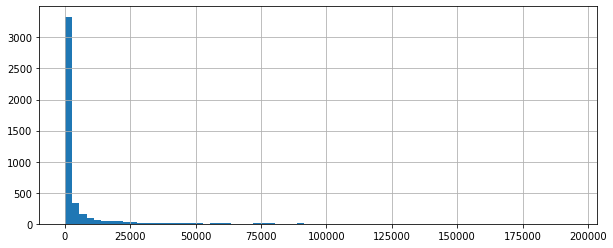

In [26]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

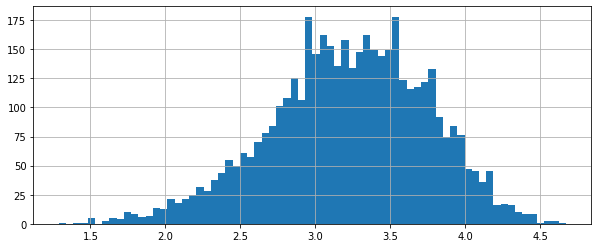

In [27]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=70)

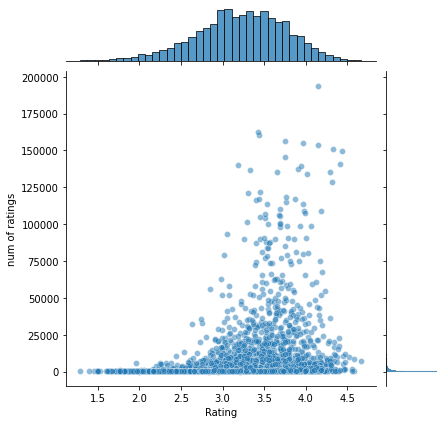

In [28]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

In [29]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Rating,num of ratings
Name,,
Pirates of the Caribbean: The Curse of the Black Pearl,4.153908,193941
What Women Want,3.425322,162597
Bruce Almighty,3.434517,160454
The Italian Job,3.755364,156183
American Beauty,3.962585,154832
Shrek 2,4.144543,153996
The Sixth Sense,4.325245,151292
Lord of the Rings: The Fellowship of the Ring,4.434708,149866
50 First Dates,3.750569,145519
